# Generator

This notebook demonstrates how generators are used and establishes a framework for future evaluations across different generator types.

We aim to mimic the real-world scenario in which, for a single asset, we can observe only one historical time series. However, this asset could potentially evolve into different future paths, which are unknown. The benefit of using known stochastic processes is that the potential future is now able to be simulated. For a known stochastic process, we generate one observable path and use it as a seed path to feed into the generators. We then simulate future paths based on the known process and compare them with the paths produced by the generators.

The more similar the generated future paths are to the simulated ones, the better the generator. A generator is considered consistently good if it outperforms others across various ground-truth processes.

In [20]:
import numpy as np
import simulator
import generator
import matplotlib.pyplot as plt

## Ground Truth Model

In this section, for a selected generator, we generate an observable path and simulate several future paths. We then demonstrate how different generators can perform this task.

It is important to note that we need to pass all initial states from the observable path into the generator when simulating future paths, such as the latest values of stock price, volatility, or log return.

In [21]:
# plot the seed path and future simulations from ground truth process
def plot_series(hist_price, hist_logret, fut_prices, fut_logrets):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=False)

    # --- Prices ---
    axes[0].plot(hist_price, color='black', label='realized')
    lines_p = axes[0].plot(len(hist_price) + np.arange(fut_prices.shape[-1]), fut_prices[:5].T, color='lightgrey')
    lines_p[0].set_label('future')
    for ln in lines_p[1:]: ln.set_label('_nolegend_')
    axes[0].axvline(len(hist_price), linestyle='--', label='today')
    axes[0].set_title("Stock Price Process")
    axes[0].set_xlabel("time")
    axes[0].set_ylabel("stock price")
    axes[0].legend()

    # --- Log returns ---
    axes[1].plot(hist_logret, color='black', label='realized')
    lines_r = axes[1].plot(len(hist_logret) + np.arange(fut_logrets.shape[-1]), fut_logrets[:5].T, color='lightgrey')
    lines_r[0].set_label('future')
    for ln in lines_r[1:]: ln.set_label('_nolegend_')
    axes[1].axvline(len(hist_logret), linestyle='--', label='today')  # use len(hist_logret) here
    axes[1].set_title("Log Return Process")
    axes[1].set_xlabel("time")
    axes[1].set_ylabel("log return")
    axes[1].legend()

    plt.tight_layout()
    plt.show()

In [22]:
"""GBM"""
NSIM = 10
sim_args = {
    'mu': 0.10,
    'sigma': 0.30,
    'dt' : 1/252,
    'seed': 42
}
# generate an observable path
hist_price = simulator.gbm(N=1, T=252, S0=100, **sim_args)[0]
hist_logret = simulator.prices_to_logreturns(hist_price, axis=-1)
# simulate future paths
fut_prices = simulator.gbm(N=NSIM, T=60, S0=hist_price[-1], **sim_args)
fut_logrets = simulator.prices_to_logreturns(fut_prices, axis=-1)

In [23]:
"""CEV
NSIM = 10
sim_args = {
    'mu': 0.20,
    'sigma': 0.30,
    'beta': 0.8,
    'dt' : 1/252,
    'scheme': 'milstein',
    'boundary': 'truncate',
    'seed': 42,
}
# generate an observable path
hist_price = simulator.cev(N=1, T=252, S0=100, **sim_args)[0]
hist_logret = simulator.prices_to_logreturns(hist_price, axis=-1)
# simulate future paths
fut_prices = simulator.cev(N=NSIM, T=60, S0=hist_price[-1], **sim_args)
fut_logrets = simulator.prices_to_logreturns(fut_prices, axis=-1)
"""

"CEV\nNSIM = 10\nsim_args = {\n    'mu': 0.20,\n    'sigma': 0.30,\n    'beta': 0.8,\n    'dt' : 1/252,\n    'scheme': 'milstein',\n    'boundary': 'truncate',\n    'seed': 42,\n}\n# generate an observable path\nhist_price = simulator.cev(N=1, T=252, S0=100, **sim_args)[0]\nhist_logret = simulator.prices_to_logreturns(hist_price, axis=-1)\n# simulate future paths\nfut_prices = simulator.cev(N=NSIM, T=60, S0=hist_price[-1], **sim_args)\nfut_logrets = simulator.prices_to_logreturns(fut_prices, axis=-1)\n"

In [24]:
"""Merton
NSIM = 10
sim_args = {
    'mu': 0.10, 'sigma': 0.30, 'dt' : 1/252,
    'lamb': 0.5, 'mJ': -0.1, 'sJ': 0.2,
    'adjust_drift': True, 'seed': 42
}
# generate an observable path
hist_price = simulator.merton(N=1, T=252, S0=100, **sim_args)[0]
hist_logret = simulator.prices_to_logreturns(hist_price, axis=-1)
# simulate future paths
fut_prices = simulator.merton(N=NSIM, T=60, S0=hist_price[-1], **sim_args)
fut_logrets = simulator.prices_to_logreturns(fut_prices, axis=-1)
"""

"Merton\nNSIM = 10\nsim_args = {\n    'mu': 0.10, 'sigma': 0.30, 'dt' : 1/252,\n    'lamb': 0.5, 'mJ': -0.1, 'sJ': 0.2,\n    'adjust_drift': True, 'seed': 42\n}\n# generate an observable path\nhist_price = simulator.merton(N=1, T=252, S0=100, **sim_args)[0]\nhist_logret = simulator.prices_to_logreturns(hist_price, axis=-1)\n# simulate future paths\nfut_prices = simulator.merton(N=NSIM, T=60, S0=hist_price[-1], **sim_args)\nfut_logrets = simulator.prices_to_logreturns(fut_prices, axis=-1)\n"

In [25]:
"""Variance Gamma
NSIM = 10
sim_args = {
    'r': 0.03, 'q': 0.0, 'theta': -0.1, 'sigma': 0.25, 'nu': 0.2,
    'dt': 1/252, 'martingale': True, 'seed': 42,
}
# generate an observable path
hist_price = simulator.variance_gamma(N=1, T=252, S0=100,**sim_args)[0]
hist_logret = simulator.prices_to_logreturns(hist_price, axis=-1)
# simulate future paths
fut_prices = simulator.variance_gamma(N=NSIM, T=60, S0 = hist_price[-1], **sim_args)
fut_logrets = simulator.prices_to_logreturns(fut_prices, axis=-1)
"""

"Variance Gamma\nNSIM = 10\nsim_args = {\n    'r': 0.03, 'q': 0.0, 'theta': -0.1, 'sigma': 0.25, 'nu': 0.2,\n    'dt': 1/252, 'martingale': True, 'seed': 42,\n}\n# generate an observable path\nhist_price = simulator.variance_gamma(N=1, T=252, S0=100,**sim_args)[0]\nhist_logret = simulator.prices_to_logreturns(hist_price, axis=-1)\n# simulate future paths\nfut_prices = simulator.variance_gamma(N=NSIM, T=60, S0 = hist_price[-1], **sim_args)\nfut_logrets = simulator.prices_to_logreturns(fut_prices, axis=-1)\n"

In [26]:
"""Heston
NSIM = 10
sim_args = {
    'mu': 0.10, 'kappa':2.0, 'theta':0.04,
    'xi': 0.6, 'rho':-0.7, 'dt': 1/252, 'seed': 42
}
# generate an observable path
hist_price, hist_var = simulator.heston(N=1, T=252, S0=100, v0=None, **sim_args)
hist_price = hist_price[0]; hist_var = hist_var[0]
hist_logret = simulator.prices_to_logreturns(hist_price, axis=-1)
# simulate future paths
# Caution: also need volatility paths here
fut_prices, _ = simulator.heston(N=NSIM, T=60, S0=hist_price[-1], v0=hist_var[-1], **sim_args)
fut_logrets = simulator.prices_to_logreturns(fut_prices, axis=-1)
"""

"Heston\nNSIM = 10\nsim_args = {\n    'mu': 0.10, 'kappa':2.0, 'theta':0.04,\n    'xi': 0.6, 'rho':-0.7, 'dt': 1/252, 'seed': 42\n}\n# generate an observable path\nhist_price, hist_var = simulator.heston(N=1, T=252, S0=100, v0=None, **sim_args)\nhist_price = hist_price[0]; hist_var = hist_var[0]\nhist_logret = simulator.prices_to_logreturns(hist_price, axis=-1)\n# simulate future paths\n# Caution: also need volatility paths here\nfut_prices, _ = simulator.heston(N=NSIM, T=60, S0=hist_price[-1], v0=hist_var[-1], **sim_args)\nfut_logrets = simulator.prices_to_logreturns(fut_prices, axis=-1)\n"

In [27]:
"""GARCH
NSIM = 10
sim_args = {
    'omega': 1e-6, 'alpha': 0.05, 'beta': 0.94, 'mu': 0.0, 'phi': 0.1,
    'dist': 'normal', 'seed': 42
}
# generate an observable path
hist_price, prev_var, prev_r = simulator.garch_ret(N=1,T=252, S0=100, v0=None, r0=0, **sim_args)
hist_price = hist_price[0]; prev_var = prev_var[0]; prev_r = prev_r[0]
hist_logret = simulator.prices_to_logreturns(hist_price, axis=-1)
# simulate future paths
fut_prices, _, _ = simulator.garch_ret(N=10, T=60, S0=hist_price[-1], v0=prev_var, r0=prev_r, **sim_args)
fut_logrets = simulator.prices_to_logreturns(fut_prices, axis=-1)
"""

"GARCH\nNSIM = 10\nsim_args = {\n    'omega': 1e-6, 'alpha': 0.05, 'beta': 0.94, 'mu': 0.0, 'phi': 0.1,\n    'dist': 'normal', 'seed': 42\n}\n# generate an observable path\nhist_price, prev_var, prev_r = simulator.garch_ret(N=1,T=252, S0=100, v0=None, r0=0, **sim_args)\nhist_price = hist_price[0]; prev_var = prev_var[0]; prev_r = prev_r[0]\nhist_logret = simulator.prices_to_logreturns(hist_price, axis=-1)\n# simulate future paths\nfut_prices, _, _ = simulator.garch_ret(N=10, T=60, S0=hist_price[-1], v0=prev_var, r0=prev_r, **sim_args)\nfut_logrets = simulator.prices_to_logreturns(fut_prices, axis=-1)\n"

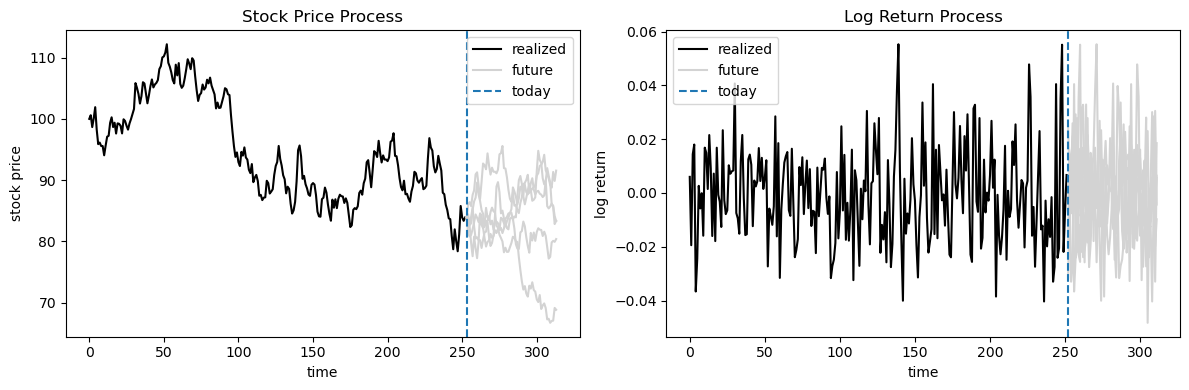

In [28]:
plot_series(hist_price, hist_logret, fut_prices, fut_logrets)

As the plot shows, the black line is what we have realized as what you can observe on markets. The grey line are potential future paths through simulations.

## Bootstrap Generator

In [29]:
# compare simulations and generations
def show_compare(logret_sims, price_sims):
    # hist_price, fut_logrets, fut_prices are macro variables

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # --- Left: log returns ---
    axes[0].plot(len(hist_price)+np.arange(fut_logrets.shape[-1]), fut_logrets.T, color = 'grey')
    axes[0].plot(len(hist_price)+np.arange(logret_sims.shape[-1]), logret_sims.T, color = 'blue')
    axes[0].set_title("log returns")

    axes[1].plot(len(hist_price)+np.arange(fut_prices.shape[-1]), fut_prices.T, color = 'grey')
    axes[1].plot(len(hist_price)+np.arange(price_sims.shape[-1]), price_sims.T, color = 'blue')
    axes[1].set_title("prices")

    plt.tight_layout()
    plt.show()

In [30]:
# train generator
gen_bs = generator.BootstrapPathwise(
    lookback=20, sig_level=2, forward=5, dt=1, k=10,
    neighbor_weighting="softmax", random_state=42
).fit_logrets([hist_logret])

# generate new series
logret_bs = np.array([
    gen_bs.generate_logrets(seed_path=hist_logret[-25:], n_total_steps=25+60, return_full_path=False) for _ in range(NSIM)])
price_bs = generator.logrets_to_prices(logret_bs, hist_price[-1])[:,1:]

100%|██████████| 227/227 [00:00<00:00, 84609.17it/s]


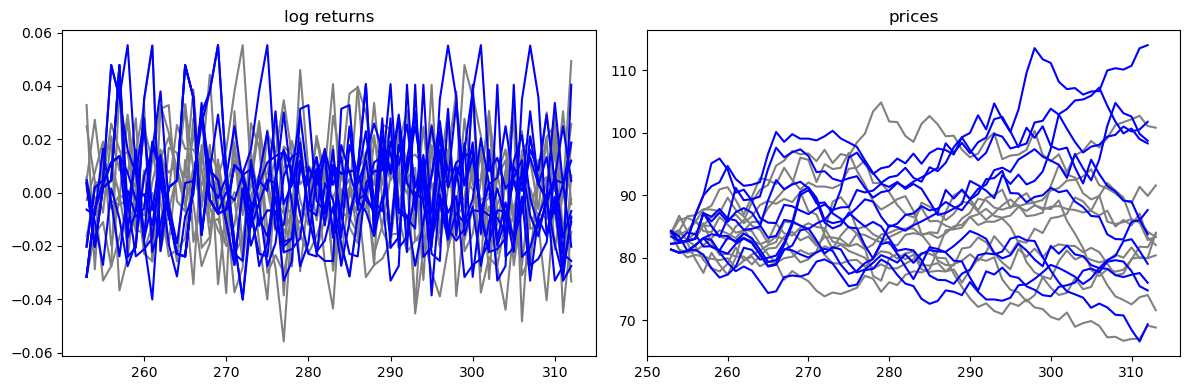

In [31]:
show_compare(logret_bs, price_bs)

The grey lines are simulations of future paths from ground truth process, the blue lines are generated future paths through current generator.

## Hybrid Generator

In [32]:
gen_hb = generator.HybridKRRBootstrap(
    lookback=20, sig_level=2, dt=1, k=10, lam = 1,
    neighbor_weighting="softmax", random_state=42
).fit_logrets([hist_logret])

# generate new series
logret_hb = np.array([
    gen_hb.generate_logrets(seed_path=hist_logret[-25:], n_total_steps=25+60, return_full_path=False) for _ in range(NSIM)])
price_hb = generator.logrets_to_prices(logret_hb, hist_price[-1])[:,1:]

100%|██████████| 232/232 [00:00<00:00, 34730.48it/s]


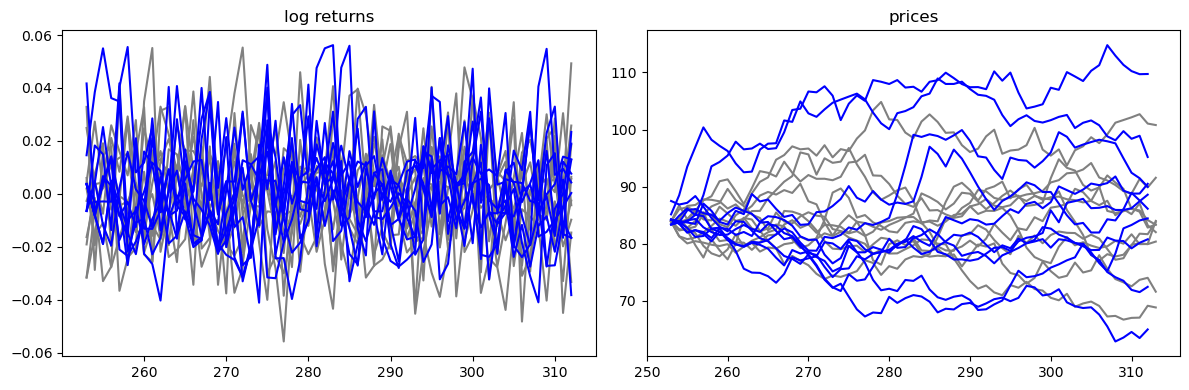

In [33]:
show_compare(logret_hb, price_hb)

## KRR Generator

In [34]:
gen_krr = generator.KRRSignature(
    lookback=20, sig_level=2, dt=1, lam_mu = 1, lam_sig = 1, random_state=42
).fit_logrets([hist_logret])

# generate new series
logret_krr = np.array([
    gen_krr.generate_logrets(seed_path=hist_logret[-25:], n_total_steps=25+60, return_full_path=False) for _ in range(NSIM)])
price_krr = generator.logrets_to_prices(logret_krr, hist_price[-1])[:,1:]

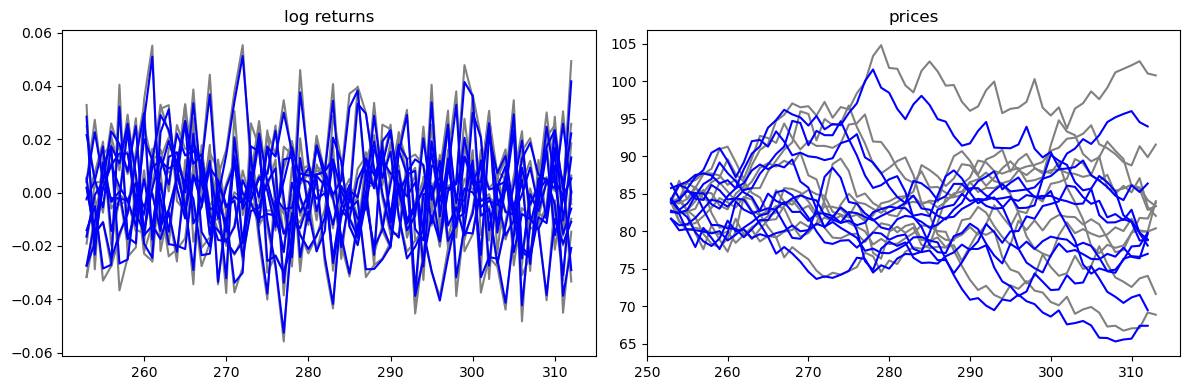

In [35]:
show_compare(logret_krr, price_krr)

## ARIMA Generator

In [36]:
gen_arima = generator.ARIMAGen(order=(1,0,1), trend='c', random_state=42).fit_logrets(hist_logret)

# generate new series
logret_arima = np.array([gen_arima.generate_logrets(n_steps=60) for _ in range(NSIM)])
price_arima = generator.logrets_to_prices(logret_arima, hist_price[-1])[:,1:]

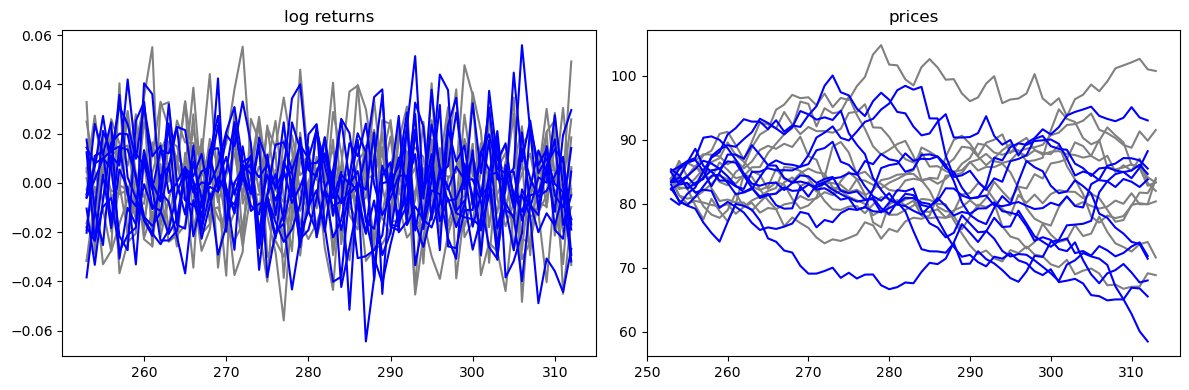

In [37]:
show_compare(logret_arima, price_arima)

## GARCH Generator

In [38]:
gen_garch = generator.GARCHGen(p=1,q=1,dist='t',random_state=42,scale='auto').fit_logrets(hist_logret)

# generate new series
logret_garch = np.array([gen_garch.generate_logrets(n_steps=60, seed_returns=hist_logret[-25:]) for _ in range(NSIM)])
price_garch = generator.logrets_to_prices(logret_garch, hist_price[-1])[:,1:]

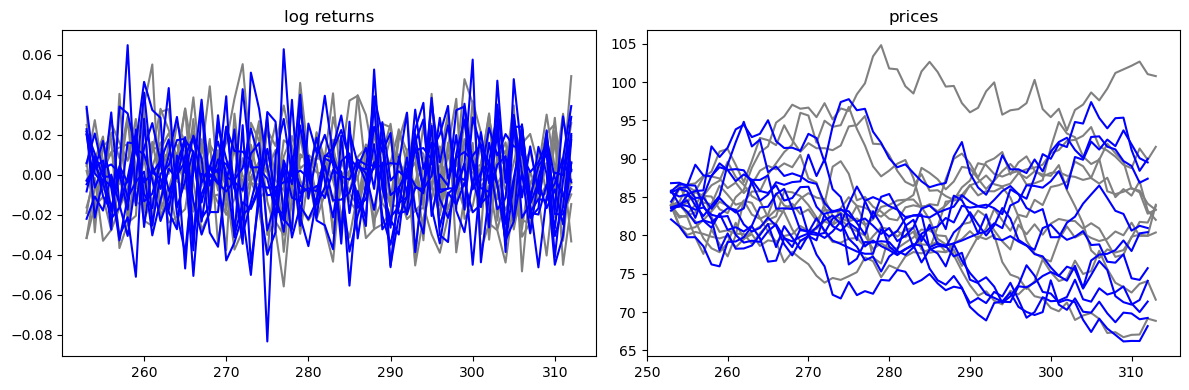

In [39]:
show_compare(logret_garch, price_garch)